## LAB Tasks


Runthe 2nd iteration of the model, adding the categorial data

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")



url="/Users/miriamg/Documents/GitHub_repo/Week 4 Machine learning/Last_marketing_customer_analysis_clean.csv"
df = pd.read_csv(url)
df#.info()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [2]:
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [3]:
categoric_df = df.select_dtypes(include = 'object')


In [4]:
numeric_df = df.select_dtypes(include ='number')
numeric_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [5]:
#Define which variable could be the one with large range, in this case income so is my vA

column_ranges = numeric_df.describe().loc[['min', 'max']]

print(column_ranges)

     unnamed:_0  customer_lifetime_value   income  monthly_premium_auto  \
min         0.0              1898.007675      0.0                  61.0   
max     10909.0             83325.381190  99981.0                 298.0   

     months_since_last_claim  months_since_policy_inception  \
min                      0.0                            0.0   
max                     35.0                           99.0   

     number_of_open_complaints  number_of_policies  total_claim_amount  month  
min                        0.0                 1.0            0.099007    1.0  
max                        5.0                 9.0         2893.239678    2.0  


In [6]:
categoric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer           10910 non-null  object
 1   state              10910 non-null  object
 2   response           10910 non-null  object
 3   coverage           10910 non-null  object
 4   education          10910 non-null  object
 5   effective_to_date  10910 non-null  object
 6   employmentstatus   10910 non-null  object
 7   gender             10910 non-null  object
 8   location_code      10910 non-null  object
 9   marital_status     10910 non-null  object
 10  policy_type        10910 non-null  object
 11  policy             10910 non-null  object
 12  renew_offer_type   10910 non-null  object
 13  sales_channel      10910 non-null  object
 14  vehicle_class      10910 non-null  object
 15  vehicle_size       10910 non-null  object
 16  vehicle_type       10910 non-null  objec

In [7]:
categoric_df.coverage.unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [8]:
categoric_df.education.unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [9]:
categoric_df.vehicle_size.unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [10]:
cov_df=categoric_df["coverage"].map({'Basic': 1, 'Extended': 2, 'Premium': 3})
cov_df

0        1
1        1
2        1
3        2
4        3
        ..
10905    3
10906    1
10907    2
10908    3
10909    1
Name: coverage, Length: 10910, dtype: int64

In [11]:
edu_df= categoric_df["education"].map({'High School or Below': 1 ,'College': 2, 'Bachelor': 3, 'Master': 4 , 'Doctor': 5 })
edu_df

0        2
1        2
2        3
3        2
4        3
        ..
10905    3
10906    2
10907    3
10908    2
10909    3
Name: education, Length: 10910, dtype: int64

In [12]:
vsize_df= categoric_df["vehicle_size"].map({'Small': 1, 'Medsize': 2, 'Large': 3})
vsize_df

0        2
1        2
2        2
3        2
4        2
        ..
10905    2
10906    2
10907    2
10908    2
10909    2
Name: vehicle_size, Length: 10910, dtype: int64

In [13]:
categorical_nominals_df = pd.get_dummies(categoric_df[[
    'state',
       'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_type']], dtype= int)

categorical_nominals_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [14]:
categorical_nominals_df.isnull().sum()

state_Arizona                     0
state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
employmentstatus_Disabled         0
employmentstatus_Employed         0
employmentstatus_Medical Leave    0
employmentstatus_Retired          0
employmentstatus_Unemployed       0
gender_F                          0
gender_M                          0
location_code_Rural               0
location_code_Suburban            0
location_code_Urban               0
marital_status_Divorced           0
marital_status_Married            0
marital_status_Single             0
policy_type_Corporate Auto        0
policy_type_Personal Auto         0
policy_type_Special Auto          0
policy_Corporate L1               0
policy_Corporate L2               0
policy_Corporate L3               0
policy_Personal L1                0
policy_Personal L2                0
policy_Personal L3                0
policy_Special L1           

In [15]:
categorical_df_ttbomk= pd.concat([cov_df, edu_df, vsize_df, categorical_nominals_df], axis=1)

categorical_df_ttbomk

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,2,2,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,2,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,2,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
3,2,2,2,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,3,3,2,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,3,3,2,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,1,2,2,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
10907,2,3,2,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
10908,3,2,2,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [16]:
complete_df = pd.concat([categorical_df_ttbomk, numeric_df],axis=1)

In [17]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   coverage                        10910 non-null  int64  
 1   education                       10910 non-null  int64  
 2   vehicle_size                    10910 non-null  int64  
 3   state_Arizona                   10910 non-null  int64  
 4   state_California                10910 non-null  int64  
 5   state_Nevada                    10910 non-null  int64  
 6   state_Oregon                    10910 non-null  int64  
 7   state_Washington                10910 non-null  int64  
 8   employmentstatus_Disabled       10910 non-null  int64  
 9   employmentstatus_Employed       10910 non-null  int64  
 10  employmentstatus_Medical Leave  10910 non-null  int64  
 11  employmentstatus_Retired        10910 non-null  int64  
 12  employmentstatus_Unemployed     

In [18]:
"""from sklearn.preprocessing import OrdinalEncoder# pass the order I want( Try this if I want)

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the data
for column in ["coverage", "vehicle_size"]:
    categoric_df[column]= encoder.fit_transform(categoric_df[column])
    
print(categoric_df[column])"""

'from sklearn.preprocessing import OrdinalEncoder# pass the order I want( Try this if I want)\n\n# Create an instance of the OrdinalEncoder\nencoder = OrdinalEncoder()\n\n# Fit and transform the data\nfor column in ["coverage", "vehicle_size"]:\n    categoric_df[column]= encoder.fit_transform(categoric_df[column])\n    \nprint(categoric_df[column])'

In [19]:
import pandas as pd
import seaborn as sns

## X-y split

In [20]:
X = complete_df.drop(columns=['total_claim_amount'])
y = complete_df[['total_claim_amount']]

## Train-test split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X,y, random_state=42)

In [23]:
X_train.describe()

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,...,vehicle_type_A,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
count,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,...,8182.0,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000,8182.000000
mean,1.478000,2.287216,1.917502,0.176363,0.379614,0.090198,0.269738,0.084087,0.046932,0.620264,...,1.0,5474.616964,8037.184417,37514.384625,93.340504,15.174644,47.928013,0.383353,2.971278,1.463212
std,0.654411,1.080494,0.522950,0.381152,0.485320,0.286483,0.443851,0.277535,0.211507,0.485351,...,0.0,3150.411121,7003.744049,30368.983779,34.858551,9.725988,27.969006,0.879545,2.390551,0.498675
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2729.250000,4006.493312,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,1.000000
50%,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.0,5495.500000,5765.182533,33738.000000,83.000000,15.000000,48.000000,0.000000,2.000000,1.000000
75%,2.000000,3.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.0,8186.750000,8980.172860,62068.750000,109.000000,23.000000,71.000000,0.384256,4.000000,2.000000
max,3.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,10907.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2.000000


## Standardize the data. PowerTransformer

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [25]:
pt = PowerTransformer()

In [26]:

ptfit = pt.fit (X_train)
X_train_scaled = ptfit.transform (X_train)

In [27]:
X_test_transformed = ptfit.transform(X_test)
X_test_transformed

array([[-0.79197819,  0.75180064, -1.7222091 , ..., -0.57987317,
         0.51680123,  1.07649387],
       [-0.79197819, -1.32766647, -1.7222091 , ...,  1.24086041,
        -1.1467141 , -0.92894166],
       [-0.79197819, -1.32766647,  0.14170554, ...,  1.89908674,
        -1.1467141 ,  1.07649387],
       ...,
       [ 1.14431765,  0.75180064, -1.7222091 , ..., -0.57987317,
        -1.1467141 , -0.92894166],
       [ 1.14431765, -0.12033866, -1.7222091 , ..., -0.57987317,
        -0.06206636, -0.92894166],
       [-0.79197819,  0.75180064,  2.12763208, ..., -0.57987317,
         0.51680123, -0.92894166]])

In [28]:
y_train_scaled = pt.fit_transform (y_train)
y_train_scaled

array([[ 1.46717679],
       [ 0.41369518],
       [ 0.53162556],
       ...,
       [-0.19545373],
       [-0.17645893],
       [ 0.5618442 ]])

In [29]:
y_test_scaled = pt.transform (y_train)

In [30]:
y_test_scaled.shape



(8182, 1)

## Applying linear regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [33]:
model.coef_

array([[-8.18244504e+00, -5.11011101e+00, -8.16705354e-01,
        -4.49060669e+00,  1.40989092e+00,  2.76564267e+00,
        -5.03505547e+00,  5.35012857e+00, -5.56534146e+00,
        -1.53148327e+01, -1.18569702e+00, -3.11416854e+01,
         5.32075566e+01, -8.53421570e+00,  8.53421570e+00,
        -2.02412631e+02,  1.79529064e+02,  2.28835670e+01,
        -2.16867786e+01, -2.36558810e+01,  4.53426596e+01,
        -6.40335102e+00, -4.11153226e+00,  1.05148833e+01,
        -7.18577660e+00,  6.53301580e-01,  1.29124004e-01,
         2.19267213e+00, -3.86139560e+00, -2.44280879e+00,
         2.83805285e+01, -7.51829295e+00, -1.03473523e+01,
        -8.64313466e+00,  5.50098259e+00,  5.86552249e+00,
        -2.72337042e+00, -5.11180070e-01, -8.83893607e-01,
         5.76698886e-02,  1.33740379e+00,  4.00670028e+00,
         2.22152563e+01,  4.52314776e+00, -1.38965835e+01,
        -2.28693823e+01,  6.02086143e+00,  0.00000000e+00,
         4.56045868e-04, -1.41478452e-04, -2.91227834e-0

In [34]:
model.intercept_

array([-95.96770322])

## Predict the total_claim_amount

In [35]:
random_customer = X_test.sample()

In [36]:
random_customer

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,...,vehicle_type_A,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
3023,1,5,2,0,0,0,1,0,0,1,...,1,3023,5789.8509,77221,71,2.0,49,0.0,7,1


In [37]:
model.predict(random_customer)

array([[199.99721339]])

In [38]:
ptfit.inverse_transform(model.predict(random_customer))

array([[3668729.41059734]])

## Create predictions for the test set

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred= pd.DataFrame(y_pred)

In [41]:
y_test = y_test.reset_index(drop=True)

In [42]:
residuals_df= pd.concat([y_test, y_pred], axis=1)

In [43]:
residuals_df= residuals_df.rename(columns= {"total_claim_amount": "y_test", 0: "y_pred"})

In [44]:
residuals_df

,y_test,y_pred
0,475.423848,374.878041
1,350.400000,423.797258
2,482.400000,546.396294
3,673.342650,576.968007
4,302.400000,316.764770
...,...,...
2723,460.266881,549.264125
2724,405.883346,404.640517
2725,41.182611,16.958890
2726,364.800000,493.157228


In [45]:
residuals_df["residual"] = residuals_df["y_test"]- residuals_df["y_pred"]

In [46]:
residuals_df.head()

,y_test,y_pred,residual
0,475.423848,374.878041,100.545807
1,350.400000,423.797258,-73.397258
2,482.400000,546.396294,-63.996294
3,673.342650,576.968007,96.374643
4,302.400000,316.764770,-14.364770


## Calculating metrics

In [47]:
mean_error = residuals_df["residual"].mean()
mean_error

2.8030321586594185

In [48]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [49]:
mse(y_test, y_pred)

19296.733785673998

In [50]:
mae(y_test, y_pred)

96.35718261760148

In [51]:
rmse= mse( y_test, y_pred, squared = False)
rmse

138.9126840345186

## Computing R2_score for train_set

In [52]:
from sklearn.metrics import r2_score

In [53]:
r2_score(y_test, y_pred)

0.7678180389464043

## Computing R2_score for train_set

In [54]:
y_pred_train = pd.DataFrame(model.predict(X_train))

In [55]:
round(r2_score(y_train, y_pred_train),2)

0.77

## Feature importance plot

In [56]:
feature_names = list(X_train.columns)

In [57]:
coefficients = model.coef_

In [58]:
coefficients = [i for i in coefficients[0]]

In [59]:
fi = {"name": feature_names, "coeff": coefficients}
fi_df = pd.DataFrame(fi)

fi_df

,name,coeff
0,coverage,-8.182445
1,education,-5.110111
2,vehicle_size,-0.816705
3,state_Arizona,-4.490607
4,state_California,1.409891
5,state_Nevada,2.765643
6,state_Oregon,-5.035055
7,state_Washington,5.350129
8,employmentstatus_Disabled,-5.565341
9,employmentstatus_Employed,-15.314833


<Axes: xlabel='coeff', ylabel='name'>

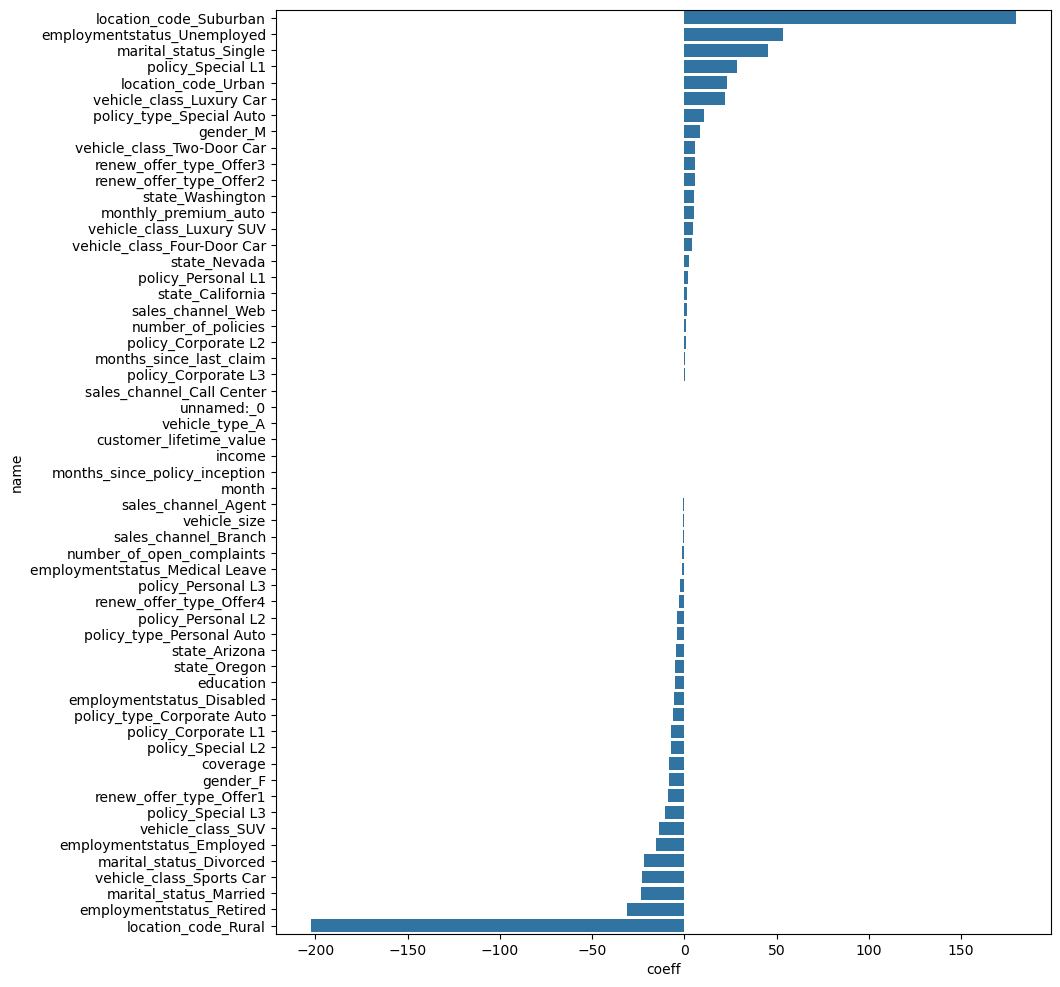

In [60]:

import seaborn as sns
import matplotlib.pyplot as plt
fi_df = fi_df.sort_values(by='coeff', ascending=False)
plt.figure(figsize=(10,12))
sns.barplot(y= fi_df['name'], x = fi_df['coeff'])

<function matplotlib.pyplot.show(close=None, block=None)>

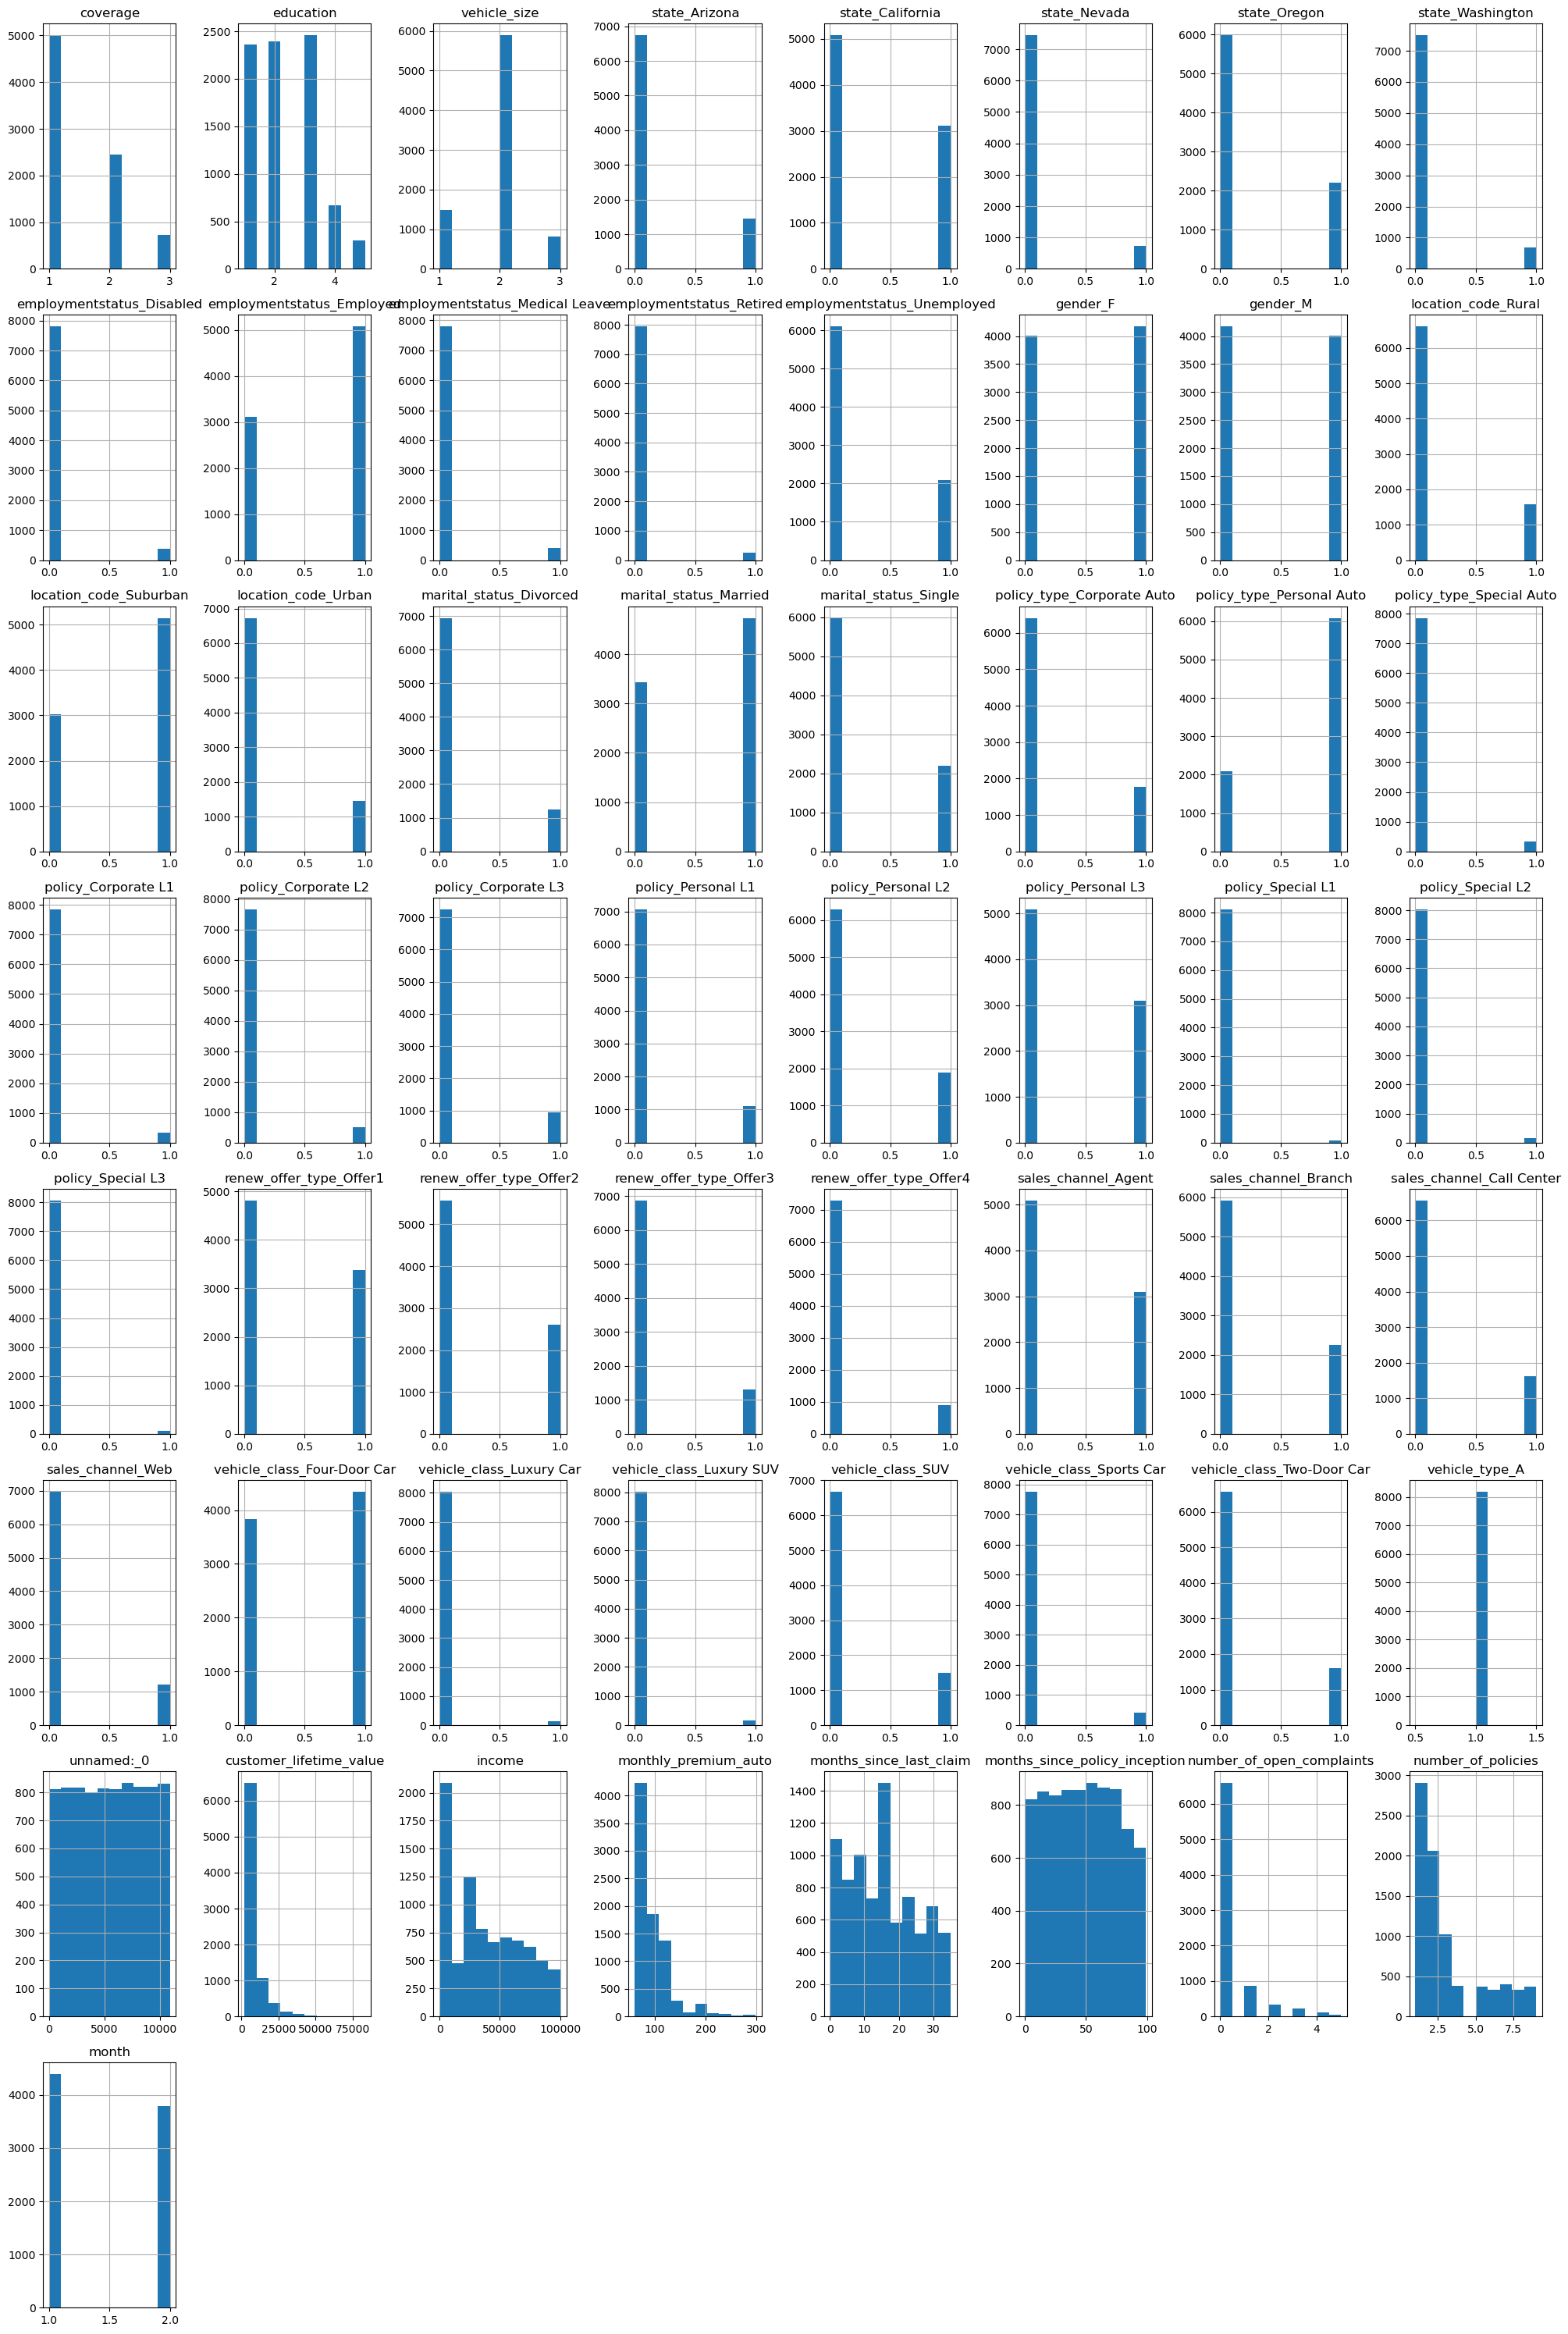

In [61]:
X_train.hist(figsize=(20, 30))
plt.tight_layout()
plt.show

### Lab | Comparing regression models
For this lab, we will be using the same dataset for the customer analysis case study we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions:

1. Fit the models LinearRegression,Lasso and Ridge and compare the model performances.
2. Define a function that takes a list of models and trains (and tests) them so we can try a lot of them without repeating code.
3. Use feature selection techniques (P-Value, RFE) to select a subset of features to train the model with (if necessary).
(optional) Re-fit the models with the selected features.

In [ ]:
#1


## Variance threshold method-Univariate method

In [62]:
from sklearn.feature_selection import VarianceThreshold # It only works with numerical features


X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

#display(X_train)
print("Initial number of numerical columns: ",X_train.shape)
print()


selector = VarianceThreshold(.1) # Default threshold value is 0
# Features with a training-set variance lower than this threshold will be removed.
selector.fit(X_train)

kept_features_indexes = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features_indexes].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final number of numerical columns: ",X_train.shape)
print()
X_train

Initial number of numerical columns:  (8182, 57)

Final number of numerical columns:  (8182, 41)



,coverage,education,vehicle_size,state_Arizona,state_California,state_Oregon,employmentstatus_Employed,employmentstatus_Unemployed,gender_F,gender_M,...,vehicle_class_Two-Door Car,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,4716.0,22217.967960,37553.0,187.0,34.0,7.0,0.0,2.0,2.0
1,1.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,8775.0,8260.639809,33321.0,105.0,6.0,2.0,0.0,3.0,1.0
2,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,4754.0,2269.841123,0.0,68.0,22.0,43.0,0.0,1.0,2.0
3,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,6569.0,8869.631143,0.0,119.0,12.0,57.0,0.0,4.0,1.0
4,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1438.0,5002.093264,0.0,70.0,35.0,56.0,0.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,3.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,5734.0,3810.238281,0.0,108.0,7.0,57.0,0.0,1.0,2.0
8178,2.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,5191.0,3815.851163,38651.0,98.0,12.0,83.0,0.0,1.0,1.0
8179,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,5390.0,7850.590399,0.0,69.0,5.0,78.0,0.0,2.0,2.0
8180,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,860.0,4974.235309,0.0,70.0,18.0,74.0,0.0,3.0,2.0


# Correlation matrix

['monthly_premium_auto', 'income', 'total_claim_amount']


,monthly_premium_auto,income,total_claim_amount
0,61,48029,292.800000
1,64,0,744.924331
2,100,22139,480.000000
3,97,49078,484.013411
4,117,23675,707.925645
...,...,...,...
10905,253,0,1214.400000
10906,65,61146,273.018929
10907,201,39837,381.306996
10908,158,64195,618.288849


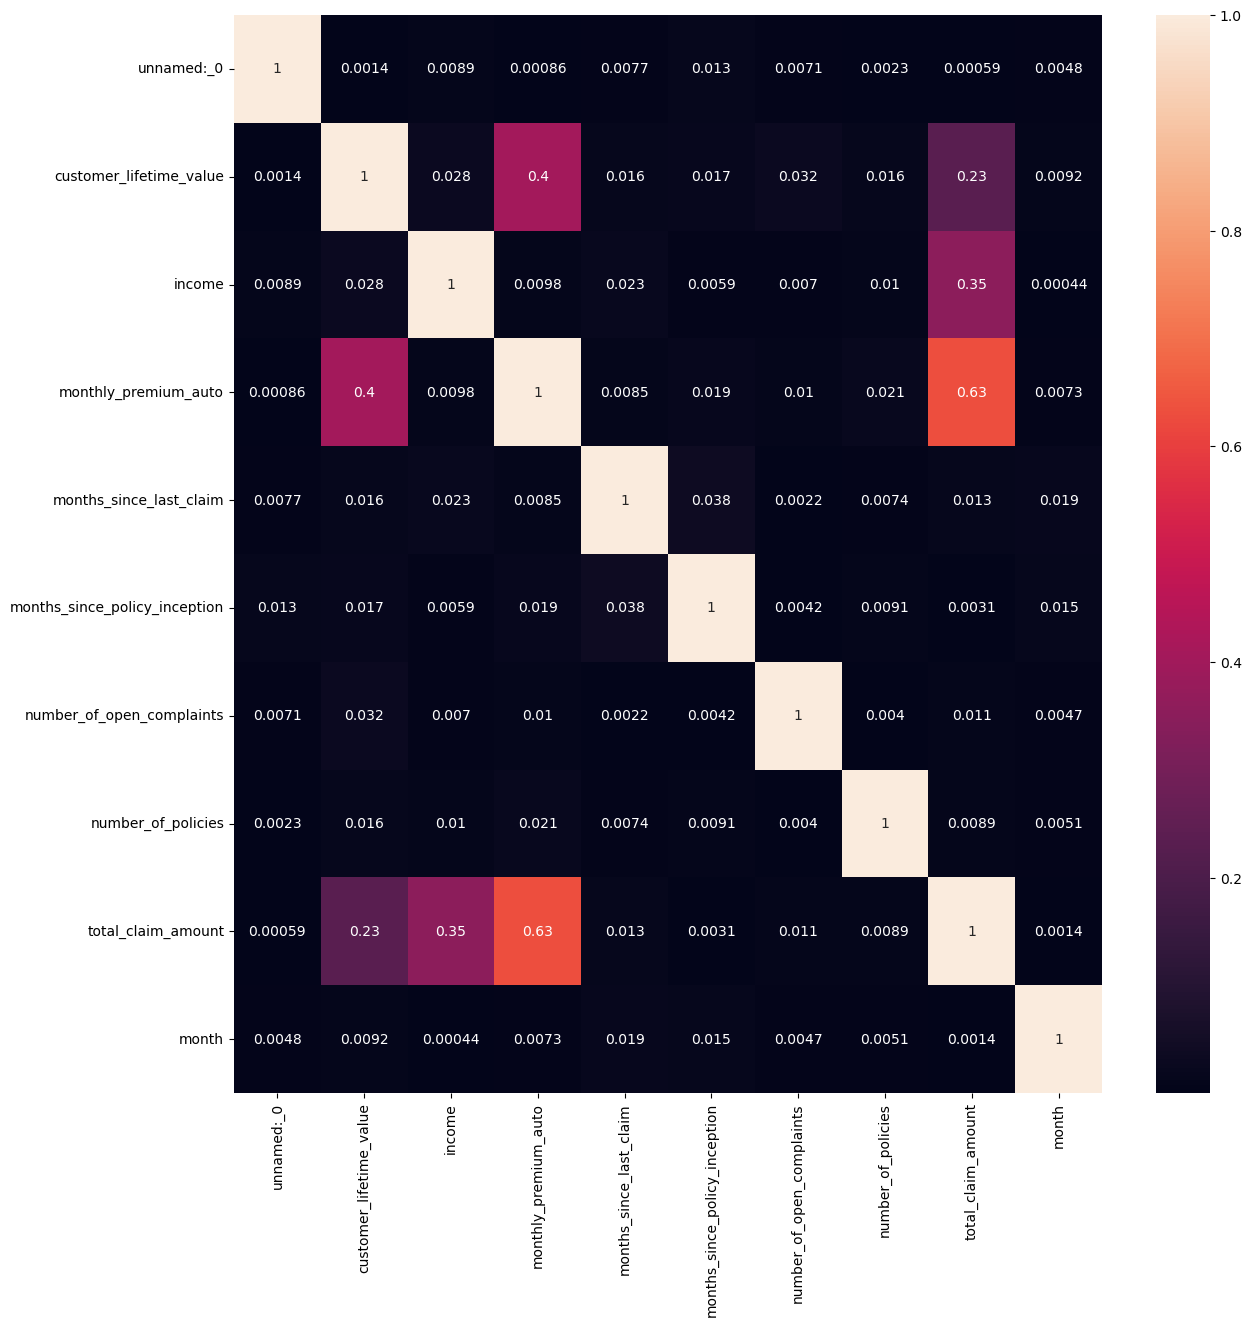

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
c = df.select_dtypes(include = np.number)
c = abs(c.corr())
#c

fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(c, annot=True);

#c['total_claim_amount']
c_last = c['total_claim_amount'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

df[cols_to_keep]

In [68]:
c.corr()

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
unnamed:_0,1.000000,-0.199246,-0.147178,-0.218197,-0.116108,-0.103628,-0.111266,-0.122136,-0.236258,-0.114499
customer_lifetime_value,-0.199246,1.000000,-0.120520,0.578938,-0.178949,-0.172136,-0.133427,-0.163794,0.339004,-0.183284
income,-0.147178,-0.120520,1.000000,-0.049602,-0.125735,-0.165134,-0.152754,-0.147491,0.398570,-0.168638
monthly_premium_auto,-0.218197,0.578938,-0.049602,1.000000,-0.209387,-0.191942,-0.189401,-0.176288,0.809486,-0.206523
months_since_last_claim,-0.116108,-0.178949,-0.125735,-0.209387,1.000000,-0.057395,-0.133146,-0.121588,-0.220425,-0.092596
months_since_policy_inception,-0.103628,-0.172136,-0.165134,-0.191942,-0.057395,1.000000,-0.127298,-0.116387,-0.236363,-0.100425
number_of_open_complaints,-0.111266,-0.133427,-0.152754,-0.189401,-0.133146,-0.127298,1.000000,-0.122505,-0.211567,-0.119225
number_of_policies,-0.122136,-0.163794,-0.147491,-0.176288,-0.121588,-0.116387,-0.122505,1.000000,-0.212076,-0.118341
total_claim_amount,-0.236258,0.339004,0.398570,0.809486,-0.220425,-0.236363,-0.211567,-0.212076,1.000000,-0.236847
month,-0.114499,-0.183284,-0.168638,-0.206523,-0.092596,-0.100425,-0.119225,-0.118341,-0.236847,1.000000


# Recursive feature elimination RFE

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE  ## recursive feature elemination technique

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)

lm = LinearRegression()

selector = RFE(lm, n_features_to_select= 15, step = 1, verbose = 1) # Step is how many features to add or drop everytime, verbose gives info about the iterations
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 fe

,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Special Auto,policy_Special L1,policy_Special L2,policy_Special L3,vehicle_class_Luxury Car,vehicle_class_SUV,vehicle_class_Sports Car
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8723,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8724,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8725,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8726,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Embedded Methods

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = X_train.select_dtypes(include=np.number)
X_test  = X_test.select_dtypes(include=np.number)

In [72]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train=imp_mean.fit_transform(X_train)
X_test = imp_mean.fit_transform(X_test)

## Ordinarily Least Squares (OLS)

In [73]:
model=LinearRegression()
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

LinearRegression: Train -> 0.7675923315596631, Test -> 0.7730729373848605


In [80]:
#Lasso model

from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=1)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.7608985282321419, Test -> 0.7653679047311918


In [76]:
#Ridge
model=Ridge(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.7673027507194926, Test -> 0.7733708582501316


In [81]:
#Elastic Net
model=ElasticNet(alpha=0)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

ElasticNet: Train -> 0.7675923315596631, Test -> 0.7730729373849263


In [84]:
#P-Value Cheat
#P-Value Using func

import statsmodels.api as sm

def feature_selection_pvalue(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    p_values = model.pvalues[1:]  # Exclude the constant term
    selected_features = X.columns[1:][p_values < significance_level]
    return selected_features


# Use case:
selected_features_pvalue = feature_selection_pvalue(X, y)
# Print or display the selected features
print("Selected Features based on P-value:")
print(selected_features_pvalue) #Columns that are statistically significant

Selected Features based on P-value:
Index(['education', 'state_Arizona', 'state_Oregon',
       'employmentstatus_Disabled', 'employmentstatus_Employed',
       'employmentstatus_Retired', 'employmentstatus_Unemployed', 'gender_F',
       'gender_M', 'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_Corporate L2', 'policy_Personal L2', 'policy_Personal L3',
       'policy_Special L1', 'renew_offer_type_Offer1', 'sales_channel_Agent',
       'sales_channel_Branch', 'sales_channel_Call Center',
       'vehicle_class_SUV', 'vehicle_class_Sports Car', 'vehicle_type_A',
       'income', 'monthly_premium_auto', 'months_since_last_claim'],
      dtype='object')
